# Выявить определяющие успешность игры закономерности

Определить потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [77]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mt
%matplotlib inline
%config InlineBackend.figure_format ='retina'
# Импортируем необходимые библиотеки.

In [78]:
games_data = pd.read_csv('/datasets/games.csv', sep=',')
display(games_data.head())
display(games_data.info())
# чтение файла. Просмотрел общий вид таблиц и посмотрел инфу по файлу.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.0",Sports,41.4,29.0,3.8,8.4,76.0,8,E
1,Super Mario Bros.,NES,"1,985.0",Platform,29.1,3.6,6.8,0.8,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.0",Racing,15.7,12.8,3.8,3.3,82.0,8.3,E
3,Wii Sports Resort,Wii,"2,009.0",Sports,15.6,10.9,3.3,3.0,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.0",Role-Playing,11.3,8.9,10.2,1.0,nan,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [79]:
#display(games_data['Rating'].value_counts())
#display(games_data['Rating'].unique())
#display(games_data[games_data['Rating'].isna()].head(20))
#display(games_data.duplicated().sum())
# методом 'value_counts' и 'unique' посмотрел уникальные значения и их колличество в столбцах, 
# просмотрел срез с NaN и проверил на дубликаты

### Вывод

###### Таблица состоит из 16715 строк и 11 столбцов. Наименование столбцов не удобны для дальнейшей работы - переводим в нижний регистр. Имеем два типа данных. Шесть столбцов с дробным числами и пять - со строчными. Есть пропуски в шести столбцах. Дубликатов нет.
 - в столбце Name есть два пропуска, не значительные пропуски не влияющие на анализ - можно удалить.
 - в столбце Year_of_Release есть пропуски года выпуска - не значительное количество меньше 2% от фрейма - можно заменить на 0.Тип данных переводим в целочисленный.
 - в столбце Genre есть два пропуска(теже, что и в столбце Name), не значительные пропуски не влияющие на анализ - можно удалить.
 - в столбце Critic_Score много пропусков, связи пропусков с другими столбцами нет, пропуски в строках встречаются во всех оценочных стобцах, скорее всего эти игры не оценивались ни одним рейтинговым агенством. заменяем на ноль, так как среднее или медиана исказзят результат.
 - в столбце User_Score много пропусков, связи пропусков с другими столбцами нет,  так же встречается значение tbd -  означают tbd (to be determined). Перевод простой — «будет определено».. можно заменить на 0 значения tbd, пропуски - заменяем на ноль, так как среднее или медиана исказзят результат. и не забыть перевести тип данных в тип с дробным числами.
 - в столбце Rating есть пропуски - заменяем на значение indefinite или N коротко. связи пропусков с другими столбцами нет.

### Шаг 2. Подготовьте данные

In [80]:
display(games_data.isna().sum())
# методом isna посмотрел одинаковое колличество пропущенных колличественных значений
#display(games_data.isnull().sum())
# методом isnull посмотрел одинаковое колличество пропущенных значений

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [81]:
games_data.columns = [x.lower() for x in games_data.columns]
# переводим в нижний регистр столбцы фрейма
#display(games_data.columns)

In [82]:
games_data.dropna(subset = ['name'], inplace = True)
# методом dropna удалил две строки с пропусками.
#display(games_data.isna().sum())
#display(games_data[games_data['Name'].isna()])

In [109]:
games_data.dropna(subset = ['year_of_release'], inplace = True)
games_data['year_of_release'] = games_data['year_of_release'].astype('int')
# удалил пропуски и поменял тип данных
#display(games_data[games_data['year_of_release'] == 0].tail(50))
#display(games_data.isna().sum())
#display(games_data['year_of_release'].value_counts().head())

In [84]:
games_data['critic_score'] = games_data['critic_score'].fillna(0)
#display(games_data.isna().sum())
#замена пропущенных значений в столбце 'critic_Score' на среднее методом fillna

In [85]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='ignore')
#games_data['user_score'] = games_data[games_data['user_score'] == 'tbd'].replace('tbd',0)
games_data['user_score'] = games_data['user_score'].replace('tbd',0)
# заменил значения 'tbd' на 0 при помощи логической индексации
#games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
games_data['user_score'] = games_data['user_score'].astype('float')
# поменяли тип данных на 'float'
games_data['user_score'] = games_data['user_score'].fillna(0)
# поситал среднее значение для столбца и заменил пропуски на 0
pd.options.display.float_format = '{:,.1f}'.format

In [86]:
games_data['rating'] = games_data['rating'].fillna('N')
display(games_data.isna().sum())
#display(games_data['rating'].head(60))

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [110]:
games_data['general_sales'] = games_data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
#display(games_data['general_sales'].head())

### Вывод

В ходе обработки данных, сделали следующие действия:
 - перевели в нижний регистр все столбцы фрейма;
 - в столбце Name удалили две строки с пропусками - не повлияет на анализ данных;
 - в столбце Year_of_Release было не значительное количество пропусков меньше 2% от фрейма - удалили.Тип данных перевел в целочисленный;
 - в столбце Genre были два пропуска(теже, что и в столбце Name), удалили их при обработке столбца Name;
 - в столбце Critic_Score было много пропусков, заменили на среднее значение это столбца;
 - в столбце User_Score было много пропусков, связи пропусков с другими столбцами нет, заменили на 0 значения tba, так как оно еще не определенно, а пропуски заменили на среднее значение это столбца. тип данных перевели в тип с дробным числами;
 - в столбце Rating - заменили на значение indefinite или N коротко. связи пропусков с другими столбцами нет;
 - создали новый столбец general_sales с общей суммой продаж во всех регионах.

### Шаг 3. Проведите исследовательский анализ данных

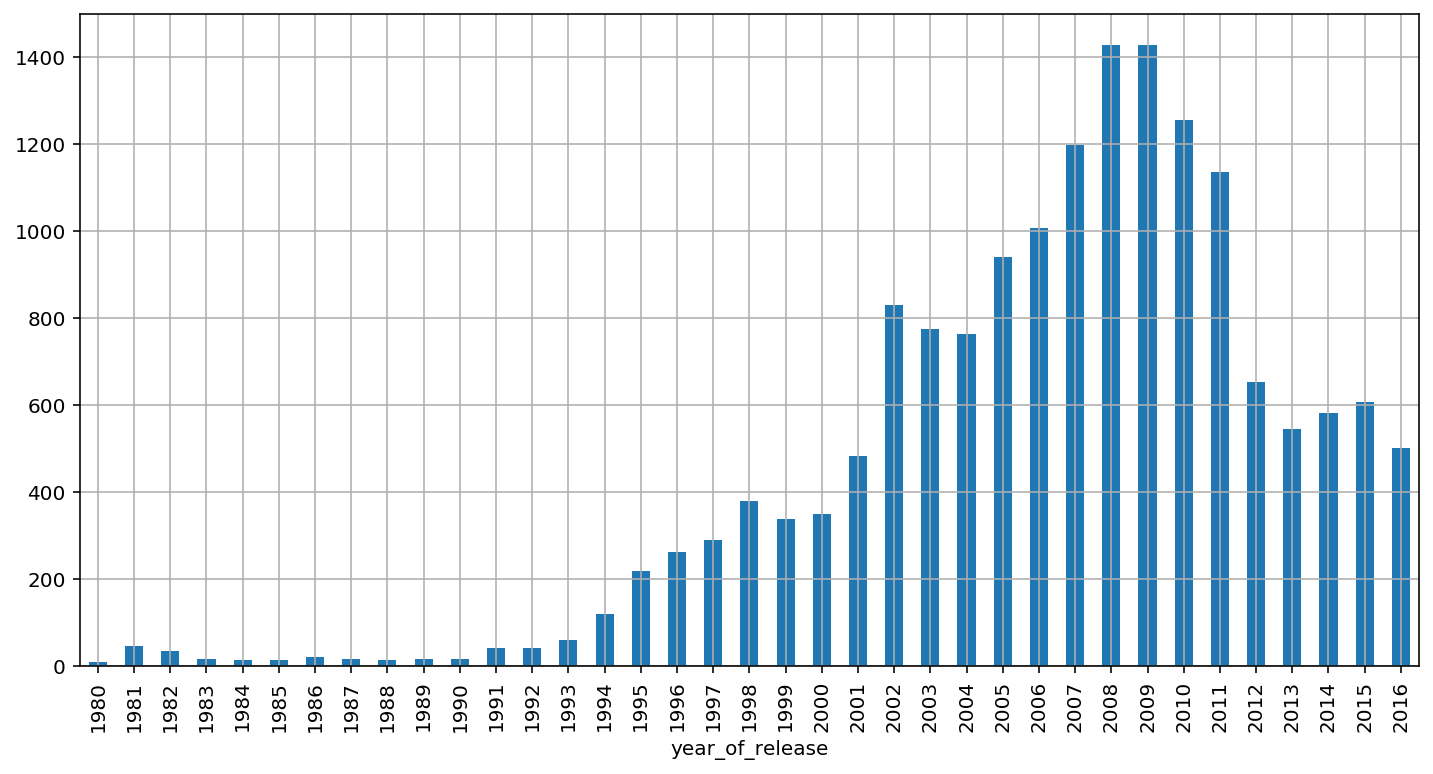

In [88]:
# Сгруппировал таблицу по году выпуска и посчитал колличество выпушенных игр, вывел столбчатую диаграмму
# Данные за все периоды не так важны,актуальный период достаточен за последнии 5 лет
group_of_year=(games_data
               .groupby('year_of_release')['year_of_release']
               .agg('count')
               .plot(y='count', kind='bar',figsize=(12, 6),grid=True)
              )

,platform,general_sales
16,PS2,"1,233.6"
28,X360,961.2
17,PS3,931.3
26,Wii,891.2
4,DS,802.8
15,PS,727.6
18,PS4,314.1
6,GBA,312.9
19,PSP,289.5
2,3DS,257.8


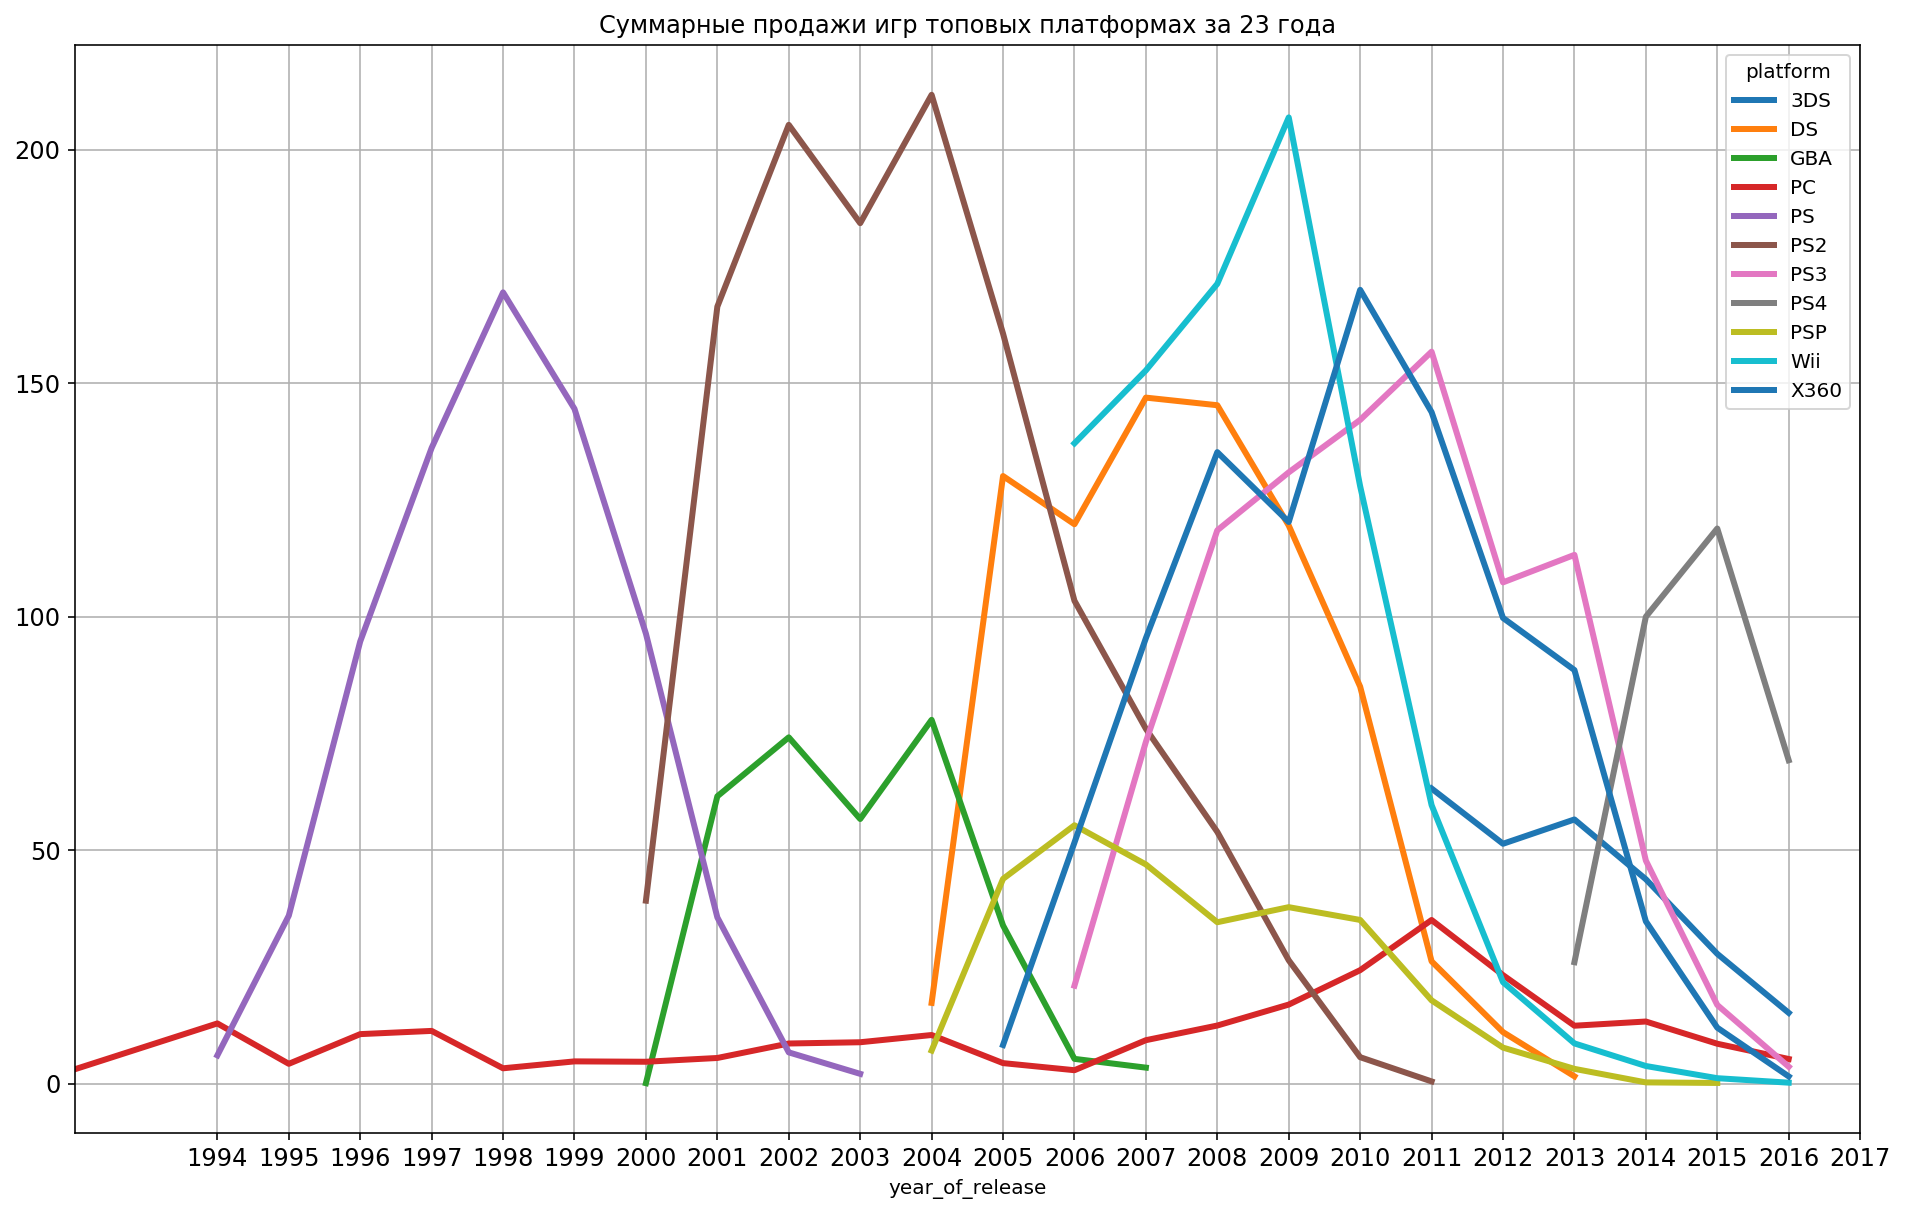

In [89]:
# Сгруппируем таблицу по платформам и посчитаем сумму общих продаж
# Определяем топ платформы по продажам - свыше 255 млн.
platform_group = (games_data
                  .groupby('platform')['general_sales']
                  .agg('sum')
                  .reset_index()
                  .sort_values(by='general_sales',ascending = False)
                 )
top_platforms = platform_group.query('general_sales > 255 ')
display(top_platforms)
# Выводим линейный график обьеденив в сводную таблицу отфильтрованные данные методом pivot_table
(games_data
 .query('year_of_release >= 1989 & platform in @top_platforms.platform')
 .pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')
 .plot(style='-', kind='line', linewidth=3, figsize=(16, 10),fontsize=12,
       grid=True, title = 'Суммарные продажи игр топовых платформах за 23 года')                 
)
plt.xticks(np.arange(1994,2018,step=1))
plt.show()

,platform,general_sales
3,PS3,285.2
4,PS4,244.9
7,X360,235.0
0,3DS,179.5
2,PC,57.4
6,Wii,35.2
1,DS,12.5
5,PSP,11.2


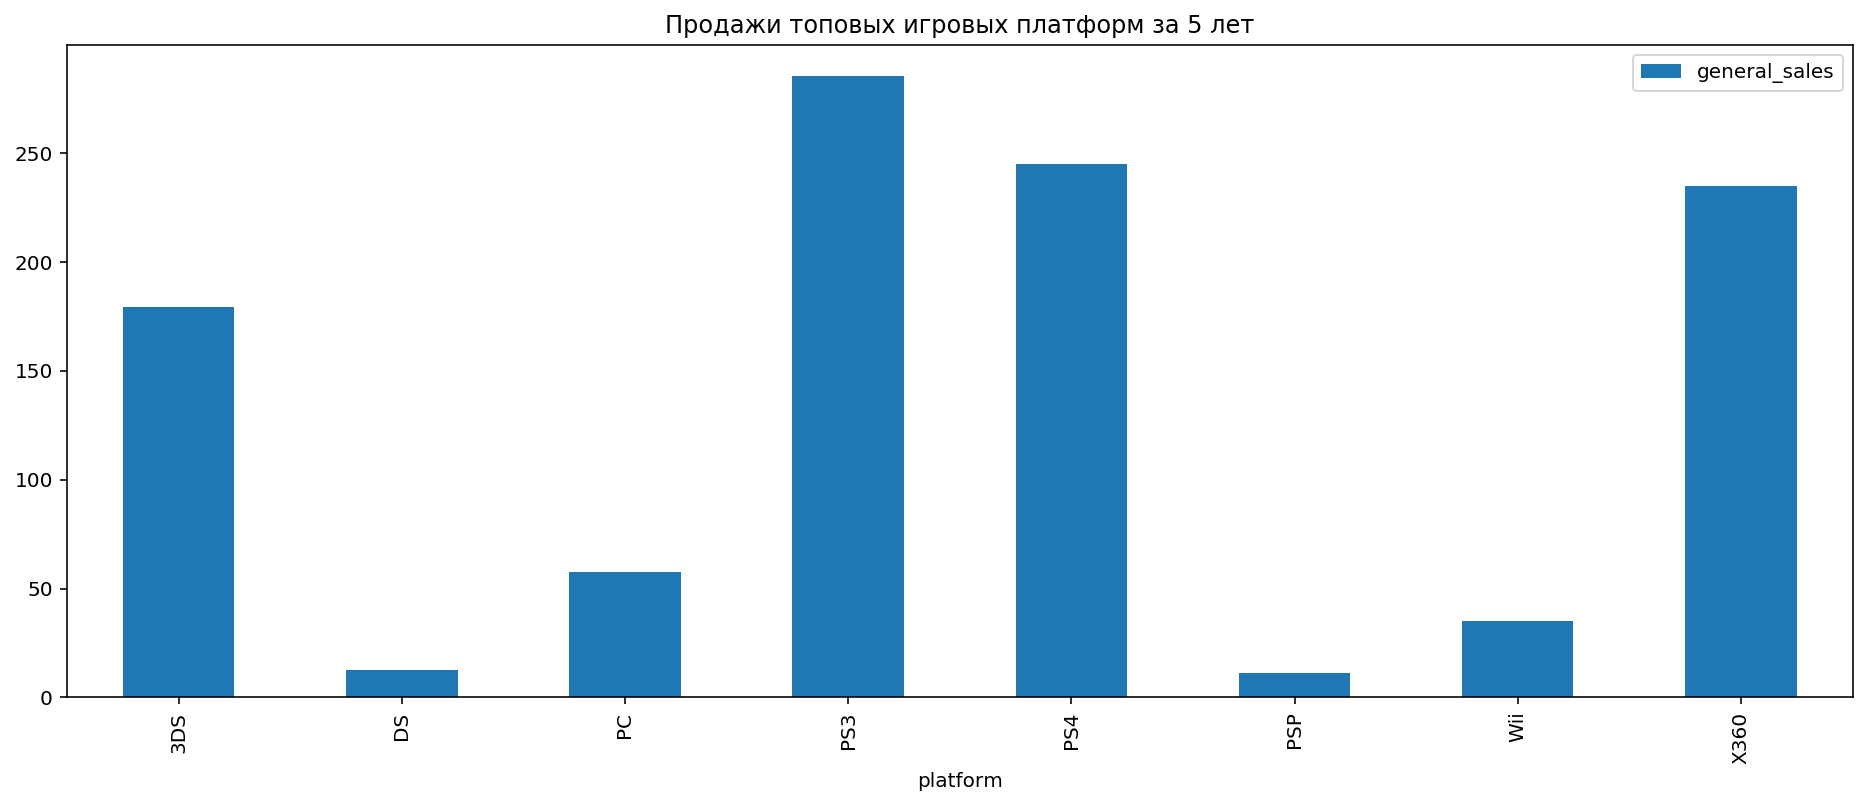

In [90]:
# фильтруем наш фрейм по нужным данным за определенный период методом query, 
# группируем таблицу по нужным столбцам методом groupby и сортируем методом sort_values, до этого переназначив индексы
new_data = games_data.query('year_of_release >= 2012 & year_of_release != 2016 & platform in @top_platforms.platform')
general_sales = (new_data
                 .groupby('platform')['general_sales']
                 .agg('sum')
                 .reset_index()
                 .sort_values(by='general_sales',ascending = False)
                )
display(general_sales)
# Выводим график с барами обьеденив в сводную таблицу отфильтрованные данные методом pivot_table
(games_data
 .query('year_of_release >= 2012 & year_of_release != 2016 & platform in @top_platforms.platform')
 .pivot_table(index='platform', values='general_sales', aggfunc='sum')
 .plot(kind='bar',figsize=(16, 6), title = 'Продажи топовых игровых платформ за 5 лет')
)

,platform,general_sales
3,PS3,285.2
4,PS4,244.9
9,X360,235.0
0,3DS,179.5
10,XOne,133.2
8,WiiU,77.6
2,PC,57.4
6,PSV,44.9
7,Wii,35.2
1,DS,12.5


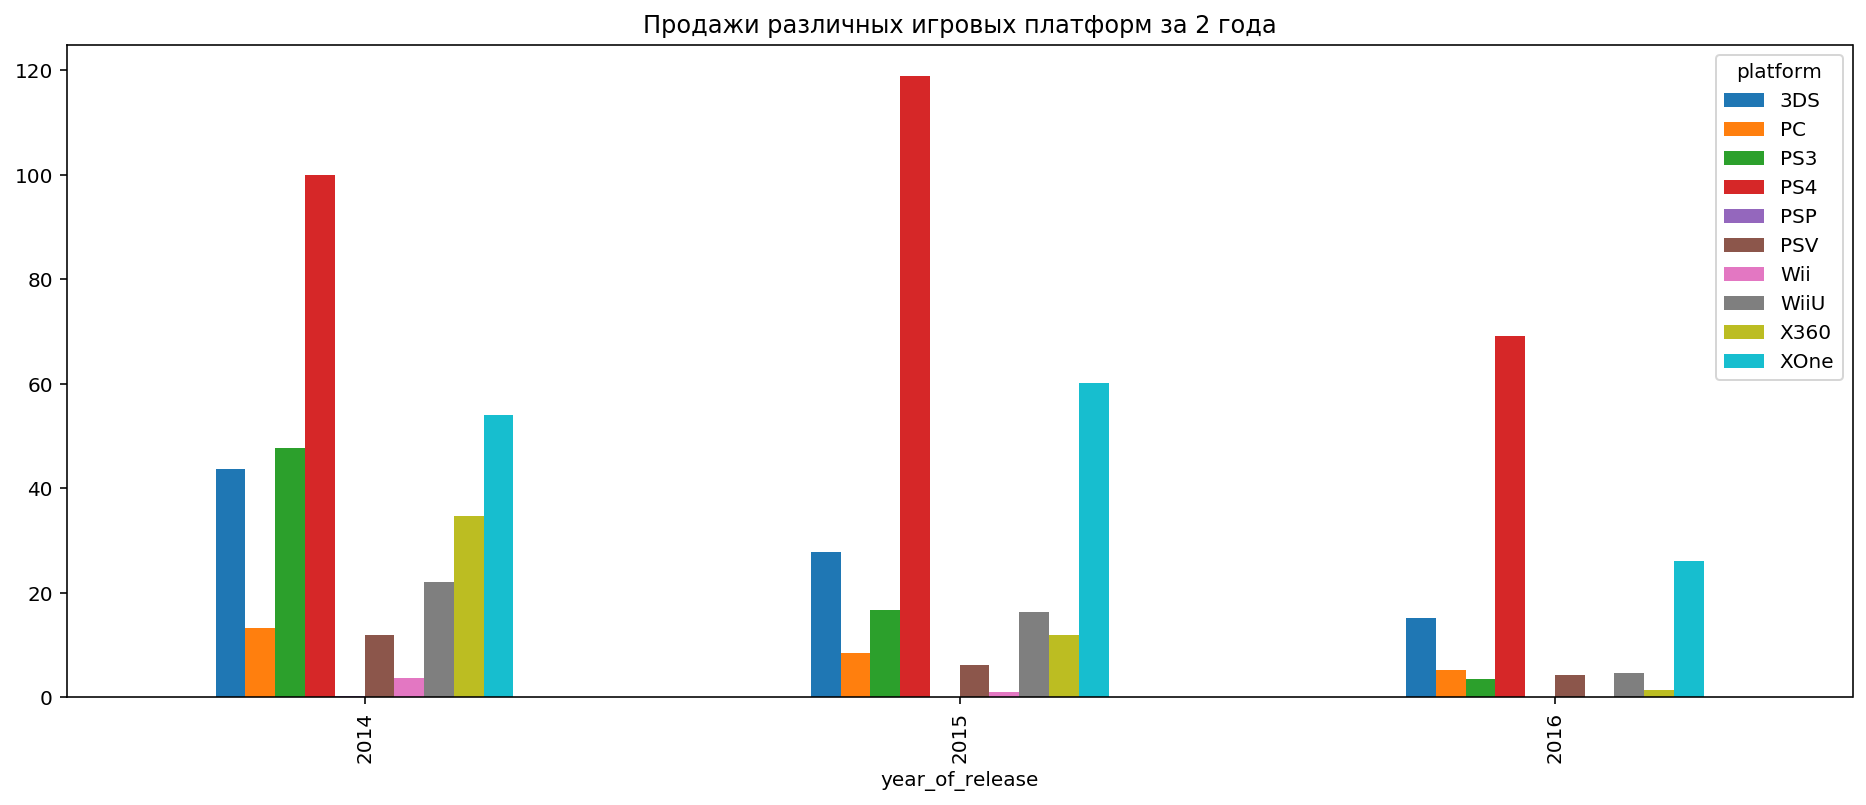

In [91]:
# фильтруем наш фрейм для определения продаж новых платфор по нужным данным за определенный период методом query, 
# группируем таблицу по нужным столбцам методом groupby и сортируем методом sort_values, до этого переназначив индексы
new_games = games_data.query('year_of_release >= 2012 & year_of_release != 2016')
new_games_sales = (new_games
                   .groupby('platform')['general_sales']
                   .agg('sum')
                   .reset_index()
                   .sort_values(by='general_sales',ascending = False)
                  )
display(new_games_sales)
# Выводим график с барами обьеденив в сводную таблицу отфильтрованные данные методом pivot_table 
# - с учетом новых платформ от 2014 гоа
(games_data
 .query('year_of_release >= 2014 ')
 .pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')
 .plot(kind='bar',figsize=(16, 6), title = 'Продажи различных игровых платформ за 2 года')               
)

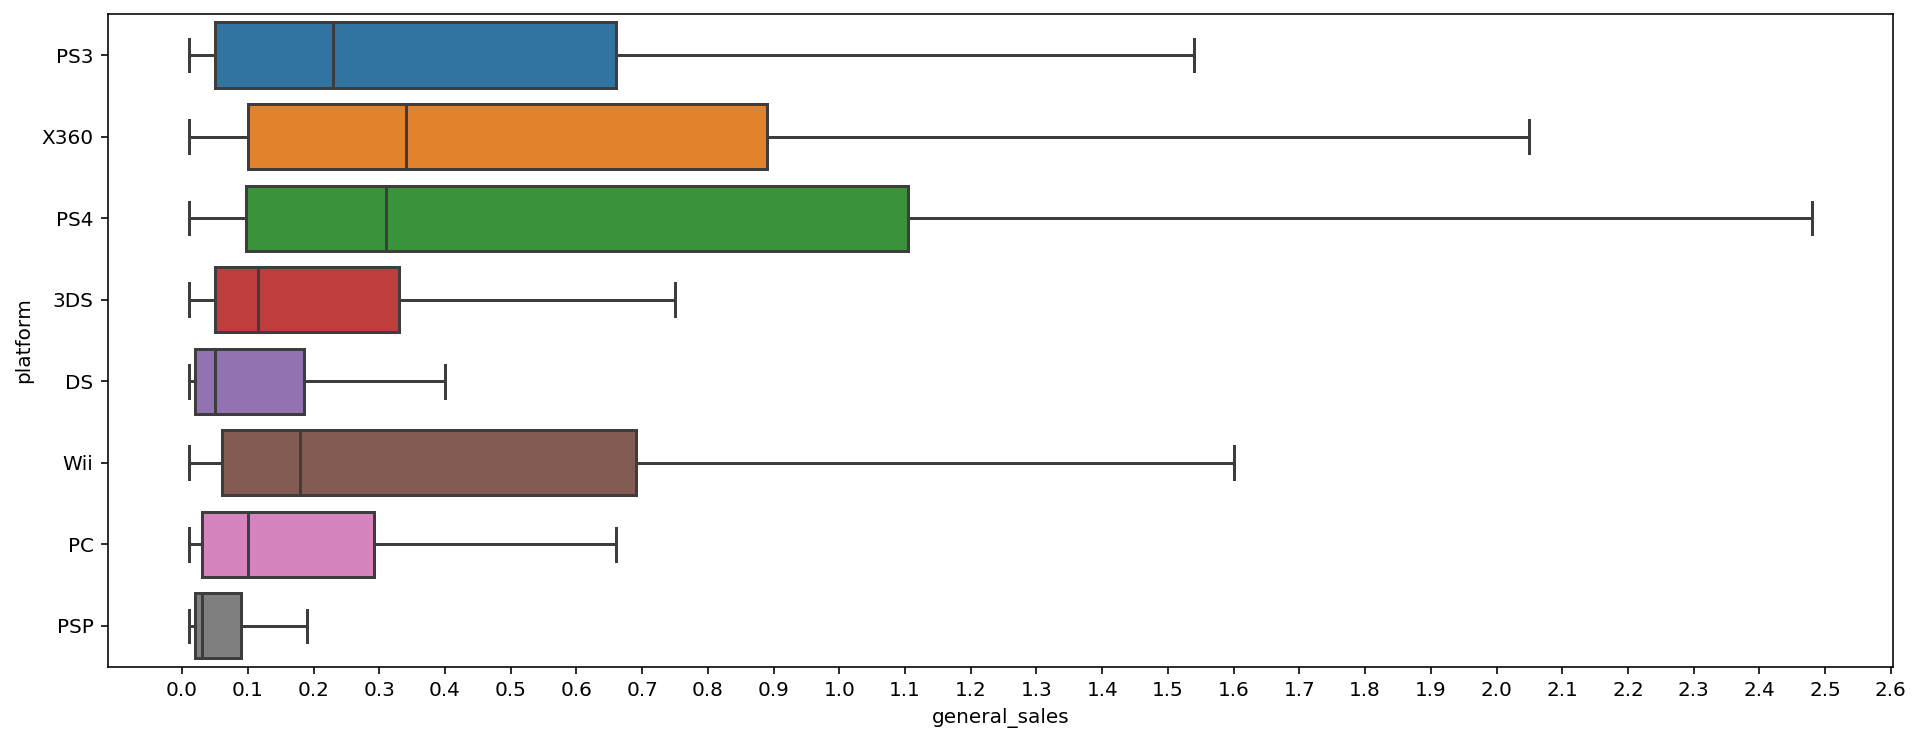

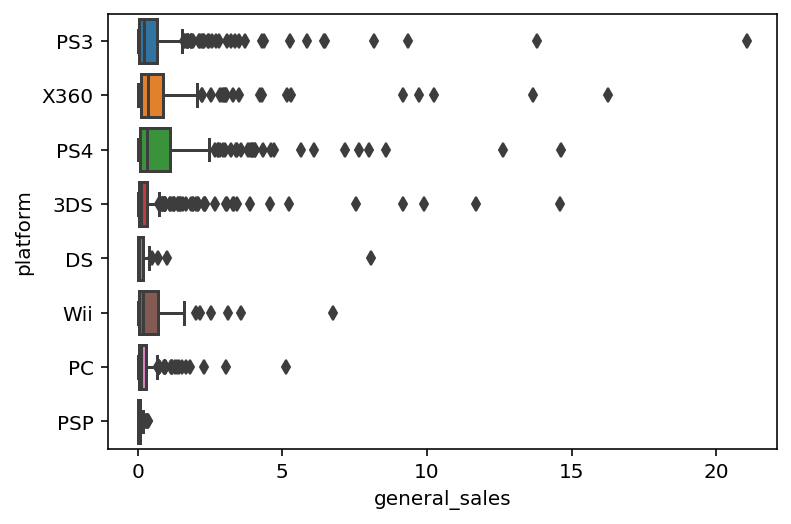

In [92]:
# Выводим диаграмму размаха ("ящик с усами") при помощи библиотеки seaborn и метода boxplot указывем зармер оси х и размер шага
# для наглядности выводим диаграмму с выбросами и без них.
plt.figure(figsize=(16,6))
plt.xticks(np.arange(0,3,step=0.1))
sns.boxplot(y="platform", x="general_sales", data=new_data, showfliers=False)
plt.show()
sns.boxplot(y="platform", x="general_sales", data=new_data)

In [93]:
# Создадим функцию, котороя будет получать фрейм и название необходимое для вывода,
# функция выводит график зависимости между значениями двух столбцов и выводит корреляцию этих значений
def plot_output(data,name):
    data.plot(y='general_sales', x='critic_score', kind='hexbin', gridsize=10,
              sharex=False, grid=True, title = ('Влияние отзывов критиков на продажи по платформе {}'.format(name)))
    plt.show()
    correlation = data['general_sales'].corr(data['critic_score'])
    display('Корреляция между отзывами критиков и продажами:{:.2f}'.format(correlation))
    data.plot(y='general_sales', x='user_score', kind='hexbin', gridsize=10,
              sharex=False, grid=True,title = ('Влияние отзывов пользователей на продажи по платформе {}'.format(name)))
    plt.show()
    correlation = data['general_sales'].corr(data['user_score'])
    display('Корреляция между отзывами пользователей и продажами:{:.2f}'.format(correlation))

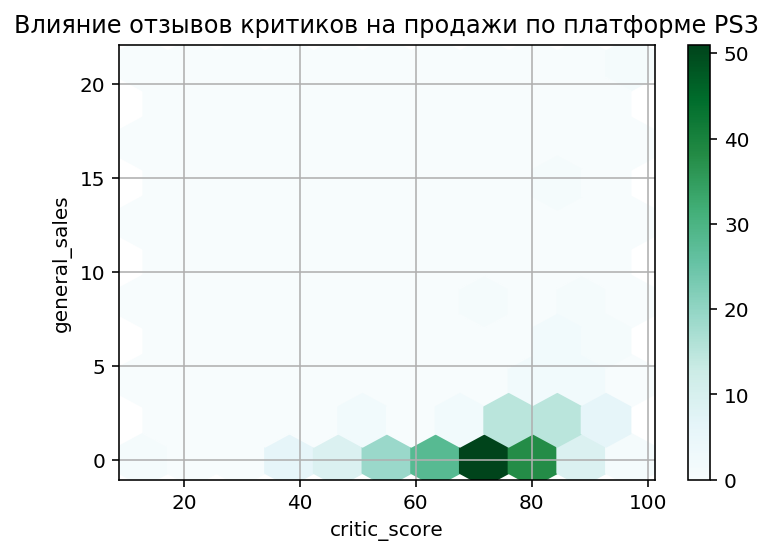

'Корреляция между отзывами критиков и продажами:0.33'

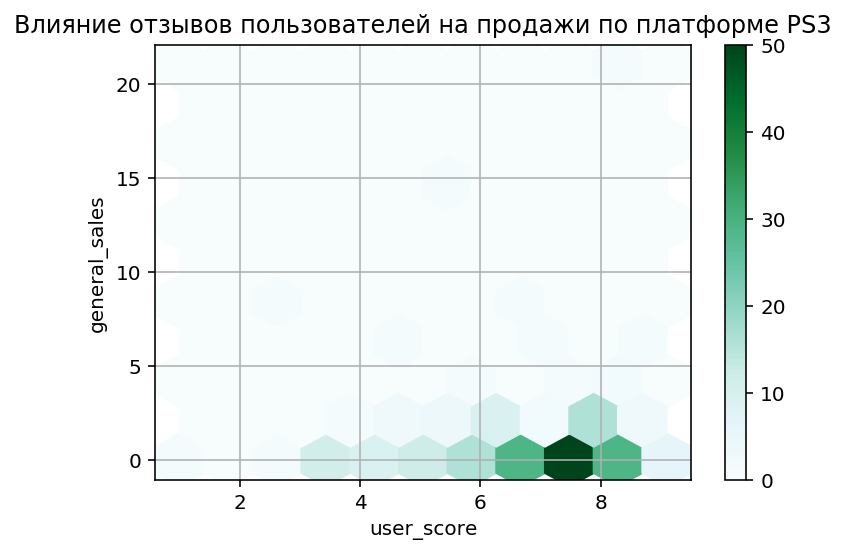

'Корреляция между отзывами пользователей и продажами:0.00'

In [94]:
# применяем функцию к отфильтрованному фрейму для игровой платформы PS3
score_data = games_data.query('year_of_release >= 2012 & year_of_release != 2016 & critic_score >0 & user_score >0')
ps3_data = score_data.query('platform == "PS3"')
plot_output(ps3_data, 'PS3')

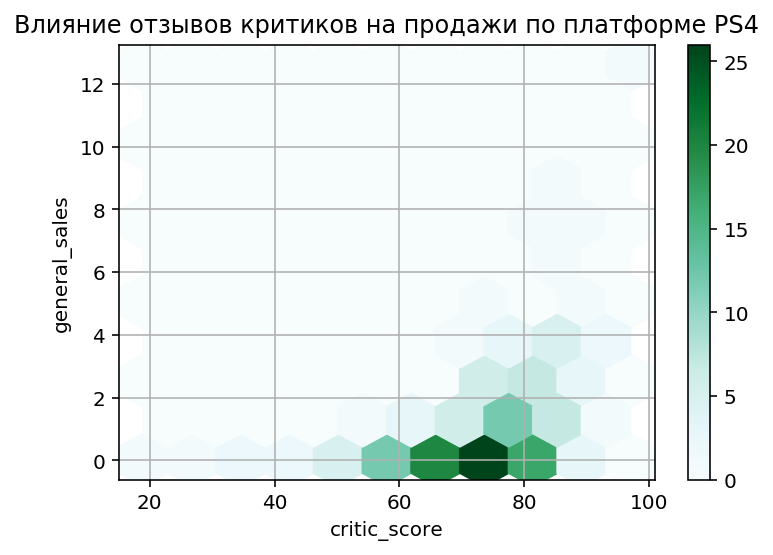

'Корреляция между отзывами критиков и продажами:0.43'

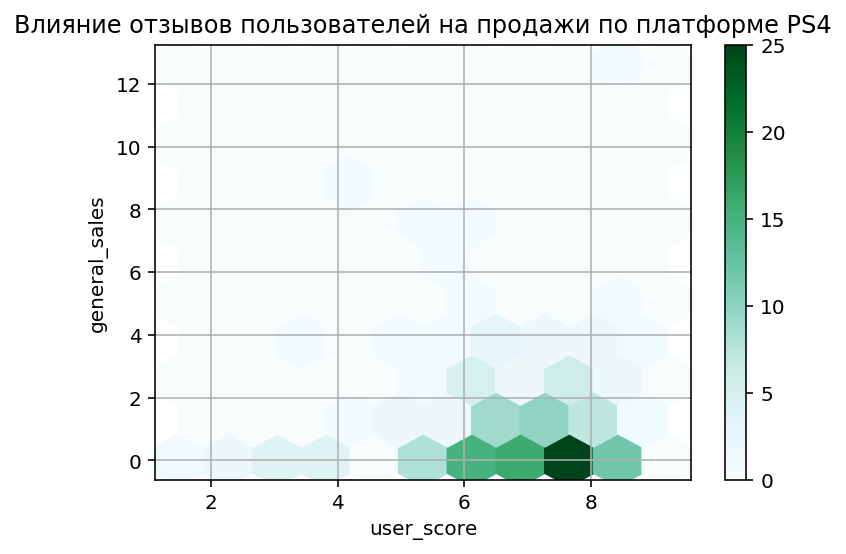

'Корреляция между отзывами пользователей и продажами:0.02'

In [95]:
# применяем функцию к отфильтрованному фрейму для игровой платформы PS4
ps4_data = score_data.query('platform == "PS4"')
plot_output(ps4_data, 'PS4')

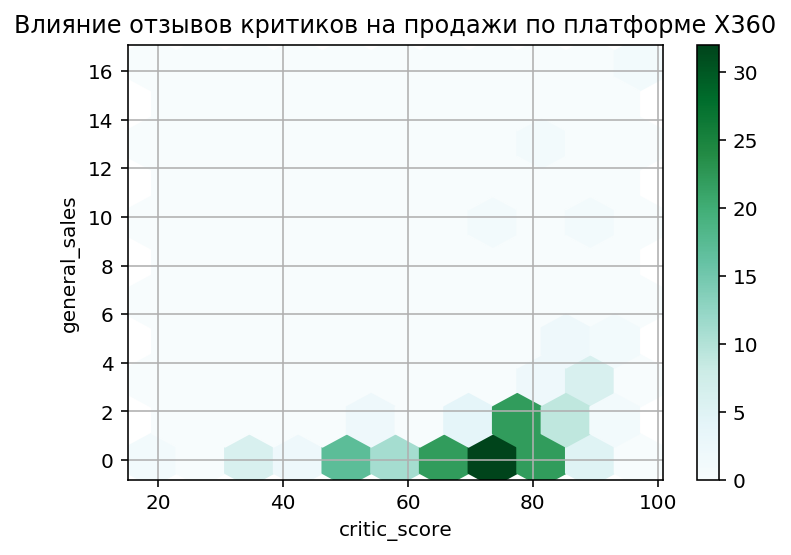

'Корреляция между отзывами критиков и продажами:0.36'

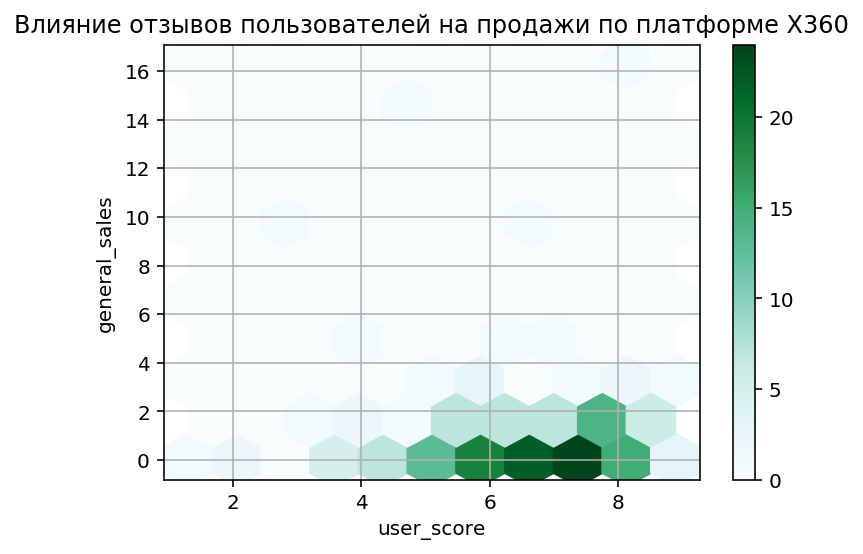

'Корреляция между отзывами пользователей и продажами:-0.00'

In [96]:
# применяем функцию к отфильтрованному фрейму для игровой платформы X360
X360_data = score_data.query('platform == "X360"')
plot_output(X360_data, 'X360')

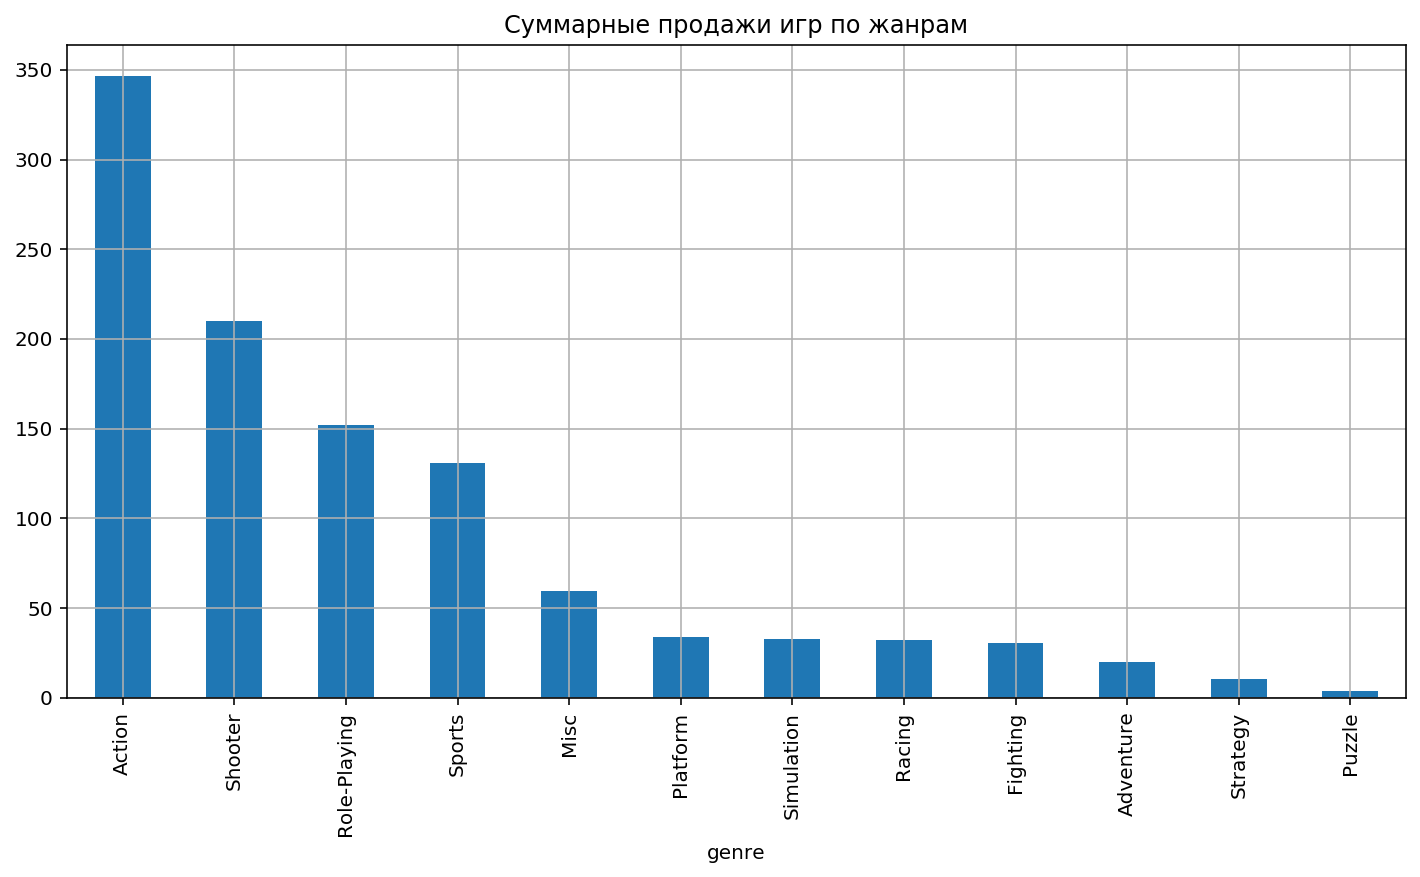

In [97]:
# Сгруппируем методом groupby таблицу по жанрам и общими продажами и выведим график с барами.
(new_data
 .groupby('genre')['general_sales']
 .agg('sum')
 .sort_values(ascending = False)
 .plot(y='sum', kind='bar',figsize=(12, 6),grid=True, title = 'Суммарные продажи игр по жанрам')
)

### Вывод

###### Исходя из проведенного анализа данных, можно сделать следующие выводы:
 1. Исследуя сколько игр выпускалось в разные годы можно понять, что для нашей рекламной компании, данные за все периоды не так важны, актуальный период достаточен за последнии 5 лет. Этот период стабильный по объемам продаж, нет ни минимальных ни максимальных периодов.
 2. Из полученной выборке по общим продажам и платформам, видны несомненные лидеры по продажам. А из полученного графика видно, что в основном старые платформы исчезают через 10-11 лет. Пик продаж по старым платформам приходится через 4 года. После 4-5 лет идет спад продаж по старым платформам. Новые платформы достигают пика уже через два года и после идет спад продаж. 
 3. Ссамые популярные платформы по продажам: X360, PS3, 3DS и  PS4, но  потенциально прибыльная платформа PS4 и XOne.
 4. Большая степени разброса (дисперсии) за пределами верхнего квартилей. Значение медианы у платформ PS4 и X360 - почти одинаковые. Значение медианы у платформ PS3 и WiiU - почти одинаковые, так же как их максимальные значения. Большое количество выбросов свыше 2.5 млн. в оснвном выьросы до 5 млн., но и есть несколько выбросов до 20 млн. Симметричны ли данные.Данные плотно сгруппированы от 0 до 1 млн.
 5. Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков
  - Отзывы критиков влияют на продажи внутри популярной платформы PS3 в средней степени. Корреляцию между отзывами и продажами составила 0,33 - слабая корреляция. Отзывы пользователей не влияют на продажи внутри популярной платформы PS3.
  - Отзывы критиков влияют на продажи внутри популярной платформы PS4 в средней степени. Корреляцию между отзывами и продажами составила 0,43 - слабая корреляция. Отзывы пользователей не влияют на продажи внутри популярной платформы PS4.
  - Отзывы критиков влияют на продажи внутри популярной платформы X360 в средней степени. Корреляцию между отзывами и продажами составила 0,36 - слабая корреляция. Отзывы пользователей не влияют на продажи внутри популярной платформы X360.
 6. Самые прибыльные жанры с высокими продажами: Action, Shooter, Sports и Role-Playing. Жанры с низкими продажами: Puzzle и Strategy.

### Шаг 4. Составьте портрет пользователя каждого региона

In [98]:
# фильтруем фрейм для получения нужных выборок методом query, создаем функцию построения сводных таблиц методом pivot_table
# и сортировки методом sort_values, с помощью перебора  циклом for областей различных регионов продаж 
new_game_data = games_data.query('year_of_release >= 2012 & year_of_release != 2016')
def sales_data(column):
    area = ['na_sales','eu_sales','jp_sales']
    for area in area:
        display(new_game_data
                .pivot_table(index=column,values=[area],aggfunc='sum')
                .sort_values(area,ascending=False).head())
sales_data('platform')

,na_sales
platform,
X360,139.4
PS3,102.7
PS4,87.2
XOne,78.8
3DS,51.2


,eu_sales
platform,
PS4,109.3
PS3,105.6
X360,73.8
XOne,42.0
3DS,40.3


,jp_sales
platform,
3DS,79.8
PS3,34.0
PSV,17.5
WiiU,12.3
PSP,10.5


In [99]:
# применяем функцию к стобцу жанр
sales_data('genre')

,na_sales
genre,
Action,168.6
Shooter,128.5
Sports,74.0
Role-Playing,58.1
Misc,37.4


,eu_sales
genre,
Action,148.7
Shooter,97.6
Sports,57.1
Role-Playing,44.2
Misc,25.7


,jp_sales
genre,
Role-Playing,58.8
Action,45.7
Misc,11.8
Simulation,10.1
Fighting,8.7


In [100]:
# применяем функцию к стобцу райтинг
sales_data('rating')

,na_sales
rating,
M,215.9
E,106.4
N,94.8
E10+,71.9
T,57.1


,eu_sales
rating,
M,177.4
E,99.4
N,84.0
E10+,51.6
T,43.2


,jp_sales
rating,
N,94.5
E,27.3
T,23.7
M,20.0
E10+,7.7


### Вывод

##### Исходя и полученных таблиц, можно сделать выводы:
##### Топ-5 платформы:
 - Для пользователей Северной Америке самые популярные платформы (топ-5) по продажам:
  1. X360; 2. PS3; 3. PS4; 4. XOne; 5. 3DS.
 - Для пользователей Европы самые популярные платформы (топ-5) по продажам:
  1. PS4; 2. PS3; 3. X360; 4. XOne; 5. 3DS.
 - Для пользователей Японии самые популярные платформы (топ-5) по продажам:
  1. 3DS; 2. PS3; 3. PSV; 4. WiiU; 5. PSP.

Больше всего продаж по топ-платформам в Северной Америке, затем в Европе и менбше всего в Японии. Рынки Северной Америке и Европы похожи по спросу на одни и теже платформы,т.е. топ-5 платформ на этих рынках одиноковы, но лидируют разные платформы. Рынок Японии отличается как лидерами продаж так и топ-5 платформ на этом рынке. Так же можно заметить предпочтение в выборе платформ в сторону портативных платформ. Платформы PS3 и 3DS встречаются на всех рынках. Платформа PS3 является самой популярной платформой и занимает второе место по продажам на всех рынках.

##### Топ-5 жанры:
 - Для пользователей Северной Америке самые популярные жанры (топ-5) по продажам:
  1. Action; 2. Shooter; 3. Sports; 4. Role-Playing; 5. Misc.
 - Для пользователей Европы самые популярные жанры (топ-5) по продажам:
  1. Action; 2. Shooter; 3. Sports; 4. Role-Playing; 5. Misc.
 - Для пользователей Японии самые популярные жанры (топ-5) по продажам:
  1. Role-Playing; 2. Action; 3. Misc; 4. Simulation; 5. Fighting.
  
Больше всего продаж по топ-жанрам в Северной Америке, затем в Европе и менбше всего в Японии. Рынки Северной Америке и Европы идентичны по спросу на одни и теже жанры игр. Рынок Японии отличается как лидерами продаж так и топ-5 платформ на этом рынке. Жанры Action, Role-Playing и Misc встречаются на всех рынках. Жанр игр Action является самым популярным и занимает первые и второе места по продажам на всех рынках.

##### Влияние рейтинга ESRB:

 - Для пользователей Северной Америки и Европы больше всего продаж у игр имеющих рейтинг "Для всех" и "Свыше 17 лет", т.е. рейтинг влияет на продажи в этих регионах  - больше продаются игры с рейтингом чем без него. 
 - Для рынка же Японии больше всего продаж у игр не имеющих рейтинга.

### Шаг 5. Проверьте гипотезы

In [101]:
x_one_data = new_game_data.query('platform == "XOne" & user_score >0')
display(x_one_data.head())
pc_data = new_game_data.query('platform == "PC" & user_score >0')
display(pc_data.head())
# отфильтруем фрейм методом query по нужным нам значениям, 
# т.е. получим две таблицы отфильтрованых по значениям "XOne" и "PC"  столбца platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
165,Grand Theft Auto V,XOne,2014,Action,2.8,2.2,0.0,0.5,97.0,7.9,M,5.5
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.2,1.6,0.0,0.5,81.0,5.4,M,5.3
242,Halo 5: Guardians,XOne,2015,Shooter,2.8,1.3,0.0,0.4,84.0,6.4,T,4.5
270,Fallout 4,XOne,2015,Role-Playing,2.5,1.3,0.0,0.4,88.0,6.2,M,4.2
373,Assassin's Creed: Unity,XOne,2014,Action,2.3,0.9,0.0,0.3,72.0,4.1,M,3.5


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
192,Diablo III,PC,2012,Role-Playing,2.4,2.2,0.0,0.5,88.0,4.0,M,5.1
458,The Sims 4,PC,2014,Simulation,1.0,1.8,0.0,0.2,70.0,3.9,T,3.1
688,Guild Wars 2,PC,2012,Action,1.0,1.1,0.0,0.3,90.0,7.9,T,2.3
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.8,0.8,0.0,0.2,82.0,4.8,T,1.8
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.8,0.7,0.0,0.2,86.0,7.9,T,1.7


In [102]:
var_x_one= np.var(x_one_data['user_score'], ddof=1)
display('Дисперсия выборки по XOne: {}'.format(var_x_one))
# Найдем дисперсию пользовательского рейтинга методом np.var для выборки по платформы XOne

'Дисперсия выборки по XOne: 1.6594932533733138'

In [103]:
var_pc = np.var(pc_data['user_score'], ddof=1)
display('Дисперсия выборки по PC: {}'.format(var_pc))
# Найдем дисперсию пользовательского рейтинга методом np.var для выборки по платформы PC

'Дисперсия выборки по PC: 2.710907608695652'

In [104]:
# создадим функцию для проверки гипотез: при помощи метода scipy.stats.ttest_ind(),
# сравнивая уровень значимости с пороговым значением alpha равным 0.05
def hypothesis(sample_1,sample_2):
    alpha = .05
    results = st.ttest_ind(sample_1, sample_2, equal_var = False)
    print('p-значение: ', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу. Принимаем альтернативную гипотезу - гипотеза о не равенстве среднего двух генеральных совокупостей")
    else:
        print("Не получилось отвергнуть нулевую гипотезу -  среднее двух генеральных совокупостей равны")
hypothesis(x_one_data['user_score'],pc_data['user_score'])

p-значение:  0.9441751855931831
Не получилось отвергнуть нулевую гипотезу -  среднее двух генеральных совокупостей равны


In [105]:
action_data = new_game_data.query('genre == "Action" & user_score >0')
display(action_data.head())
sports_data = new_game_data.query('genre == "Sports" & user_score >0')
display(sports_data.head())
# отфильтруем фрейм методом query по нужным нам значениям, 
# т.е. получим две таблицы отфильтрованых по значениям "Action" и "Sports"  столбца genre

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.0,9.1,1.0,4.0,97.0,8.2,M,21.1
23,Grand Theft Auto V,X360,2013,Action,9.7,5.1,0.1,1.4,97.0,8.1,M,16.3
42,Grand Theft Auto V,PS4,2014,Action,4.0,6.3,0.4,2.0,97.0,8.3,M,12.6
81,FIFA Soccer 13,PS3,2012,Action,1.1,5.0,0.1,2.0,88.0,6.6,E,8.2
127,Assassin's Creed III,PS3,2012,Action,2.6,2.5,0.2,1.1,85.0,6.9,M,6.4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
77,FIFA 16,PS4,2015,Sports,1.1,6.1,0.1,1.3,82.0,4.3,E,8.6
126,FIFA 14,PS3,2013,Sports,0.8,4.2,0.1,1.4,86.0,4.3,E,6.5
143,FIFA 15,PS4,2014,Sports,0.8,4.3,0.1,0.9,82.0,5.7,E,6.1
264,FIFA 15,PS3,2014,Sports,0.6,3.0,0.0,0.6,0.0,4.5,E,4.3
271,FIFA 14,X360,2013,Sports,0.9,2.9,0.0,0.4,84.0,4.2,E,4.2


In [106]:
# Найдем дисперсию пользовательского рейтинга методом np.var для выборки по жанру action
var_action = np.var(action_data['user_score'], ddof=1)
display('Дисперсия выборки по action: {}'.format(var_action))

'Дисперсия выборки по action: 1.8318081982800958'

In [107]:
# Найдем дисперсию пользовательского рейтинга методом np.var для выборки по жанру sports
var_sports = np.var(sports_data['user_score'], ddof=1)
display('Дисперсия выборки по sports: {}'.format(var_sports))

'Дисперсия выборки по sports: 2.7803470934451333'

In [108]:
# применяем функцию проверки гипотез для второй гипотезы
hypothesis(action_data['user_score'],sports_data['user_score'])

p-значение:  2.7671307856639633e-18
Отвергаем нулевую гипотезу. Принимаем альтернативную гипотезу - гипотеза о не равенстве среднего двух генеральных совокупостей


### Вывод

 В первую очередь определяем нулевую гипотезу - гипотеза о равенстве среднего двух генеральных совокупостей
Затем определяем альтернативную гипотезу - гипотеза о не равенстве среднего двух генеральных совокупостей
Пороговое значение alpha - 0.05.
 - Дисперсии пользовательского рейтинга по выборке платформ x_one и платформ pc - не равны и можно указать значение equal_var = False. Уровень значимости для выборки платформ x_one и платформ pc составил 0.94 - среднии равны для двух ГС, критерий для проверки гипотез использовался Двусторонней критической области
 - Дисперсии пользовательского рейтинга по выборке платформ action и платформ action - не равны и можно указать значение equal_var = False. Уровень значимости для выборки платформ action и платформ sports составил 2.76 - среднии не равны для двух ГС, критерий для проверки гипотез использовался Двусторонней критической области




### Шаг 6. Напишите общий вывод

###### В ходе проведенного анализа данных, можно сделать следующие выводы:
* За последние 5 лет было выпушенно не больше 650 игр  - наблюдается небольшой спад в производстве игр, это связано с развитием платформ так и самой техники и  наверное с тем, что игра становятся сложнее и для написания игр затрачивается больше времени.
* Самые популярные платформы по продажам: X360, PS3, 3DS и  PS4 , но самые потенциально прибыльная платформа PS4 и XOne, так как по остальным платформам наблюдаеся спад продаж.
* Так же мы определили, что на продажи игр популярных платформ влияют отзывы критиков и определили самые популярные жанры: Action, Shooter, Sports и Role-Playing.
* Так же мы определили что рынки продаж Северной Америки и Европы совпадают по продажам одних и тех же платформ и жанров игр, А вот рынок Японии сильно отличается.
* И еще мы определили, что рейтинга ESRB влияет на продажи в Северной Америки и Европы и больше продаются игры с рейтингом М «Для взрослых и Е «Для всех». в Японии же больше продаж по играм без рейтинга.
* Еще мы проверили две гипотезы:
  1. о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - и гипотеза подтвердилась;
  2. и о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - гипотеза не подтвердилась.

 
##### Все полученные данные определяют успешность игры. Учитывая это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Потенциально прибыльные: игры на платформах PS4 и XOne, с жанром Action, Shooter, Sports и Role-Playing, с рейтингом ESRB и желательно с отзывы критиков.